In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, RegressorMixin
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor


### Import dataset

In [2]:
df = pd.read_csv('../Data/processed_df.csv')

In [3]:
df.head()

,handgrip,weight_loss,exaustion,poor_endurance,gait_speed,balance,hearing_deficit,distance_vision,near_vision,depression_scale,...,idade_morador_8,idade_morador_9,idade_morador_10,idade_morador_11,idade_morador_12,idade_morador_13,idade_morador_14,adl_index,aadl_index,iadl_index
0,24.333333,0.0,1.0,1.0,3.500,4.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0
1,25.666667,0.0,1.0,1.0,3.300,4.0,4.0,3.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0,8.0
2,14.666667,NaN,2.0,1.0,4.595,4.0,2.0,3.0,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0
3,24.000000,0.0,1.0,1.0,5.610,4.0,3.0,2.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,5.0,8.0
4,NaN,0.0,4.0,2.0,38.145,NaN,3.0,2.0,3.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,3.0,3.0


In [4]:
df.columns

Index(['handgrip', 'weight_loss', 'exaustion', 'poor_endurance', 'gait_speed',
       'balance', 'hearing_deficit', 'distance_vision', 'near_vision',
       'depression_scale', 'sleep_quality', 'temporal_orientation',
       'memory_recall', 'semantic_memory', 'verbal_fluency', 'sexo', 'regiao',
       'etinia', 'sexo_morador_1', 'sexo_morador_2', 'sexo_morador_3',
       'sexo_morador_4', 'sexo_morador_5', 'sexo_morador_6', 'sexo_morador_7',
       'sexo_morador_8', 'sexo_morador_9', 'sexo_morador_10',
       'sexo_morador_11', 'sexo_morador_12', 'sexo_morador_13',
       'sexo_morador_14', 'papel_morador_1', 'papel_morador_2',
       'papel_morador_3', 'papel_morador_4', 'papel_morador_5',
       'papel_morador_6', 'papel_morador_7', 'papel_morador_8',
       'papel_morador_9', 'papel_morador_10', 'papel_morador_11',
       'papel_morador_12', 'papel_morador_13', 'papel_morador_14',
       'idade_morador_1', 'idade_morador_2', 'idade_morador_3',
       'idade_morador_4', 'idade_morad

### Remove missing data

In [5]:
ci_map = {
    'cognitive': ['semantic_memory', 'verbal_fluency', 'memory_recall', 'temporal_orientation'],
    'psychologicao': ['depression_scale', 'sleep_quality'],
    'locomotor': ['gait_speed', 'balance'],
    'vitality': ['handgrip', 'poor_endurance', 'weight_loss', 'exaustion'],
    'sensory': ['distance_vision', 'near_vision', 'hearing_deficit']
}

# ci_map = {
#     'cognitive': ['semantic_memory', 'verbal_fluency', 'memory_recall'],
#     'psychologicao': ['depression_scale', 'sleep_quality'],
#     'locomotor': ['gait_speed', 'balance'],
#     'vitality': ['handgrip', 'poor_endurance', 'weight_loss', 'exaustion'],
#     'sensory': ['distance_vision', 'near_vision', 'hearing_deficit']
# }
ci_cols = ['iadl_index', 'aadl_index', 'adl_index']
[ci_cols.extend(value) for value in ci_map.values()]

ci_cols

['iadl_index',
 'aadl_index',
 'adl_index',
 'semantic_memory',
 'verbal_fluency',
 'memory_recall',
 'temporal_orientation',
 'depression_scale',
 'sleep_quality',
 'gait_speed',
 'balance',
 'handgrip',
 'poor_endurance',
 'weight_loss',
 'exaustion',
 'distance_vision',
 'near_vision',
 'hearing_deficit']

In [6]:
df_clean = df.dropna(subset=ci_cols)
df_clean.shape

(6879, 63)

In [8]:
df_clean['adl_index'].value_counts()

adl_index
6.0    6239
5.0     624
4.0      10
3.0       6
Name: count, dtype: int64

In [9]:
df_clean['iadl_index'].value_counts()

iadl_index
8.0    5833
7.0     656
6.0     207
5.0     100
4.0      46
3.0      25
2.0       6
1.0       3
0.0       3
Name: count, dtype: int64

In [ ]:
df_clean['aadl_index'].value_counts()

### Split in train and test

In [17]:
import pickle
# Define dataset
df_predictive = df_clean[ci_cols]
# Split the data into training and testing sets
with open('../genetic_algorithm/out/autoencoder_scaler.pkl', 'rb') as file:
    loaded_scaler = pickle.load(file)


X_train, X_test, y_train, y_test = train_test_split(
    df_predictive.drop(columns=['iadl_index', 'aadl_index', 'adl_index'], axis=1), 
    df_predictive[['iadl_index', 'aadl_index', 'adl_index']], 
    test_size=0.2, 
    random_state=42
)

X_train_scaled = loaded_scaler.transform(X_train)
X_test_scaled = loaded_scaler.transform(X_test)



In [18]:
X_train = pd.DataFrame(X_train, columns=df_predictive.drop(columns=['iadl_index', 'aadl_index', 'adl_index']).columns)
y_train = pd.DataFrame(y_train, columns=['iadl_index', 'aadl_index', 'adl_index'])
df_train = pd.concat([X_train, y_train], axis=1)
df_train.head()

,semantic_memory,verbal_fluency,memory_recall,temporal_orientation,depression_scale,sleep_quality,gait_speed,balance,handgrip,poor_endurance,weight_loss,exaustion,distance_vision,near_vision,hearing_deficit,iadl_index,aadl_index,adl_index
1342,4.0,22.0,5.0,4.0,2.0,3.0,6.130,4.0,26.000000,1.0,0.0,1.0,3.0,3.0,3.0,8.0,4.0,6.0
8837,2.0,12.0,4.0,2.0,4.0,4.0,6.750,3.0,9.333333,1.0,1.0,2.0,4.0,2.0,3.0,8.0,5.0,6.0
7896,4.0,13.0,4.0,4.0,5.0,4.0,3.365,3.0,39.000000,1.0,0.0,1.0,2.0,2.0,2.0,8.0,6.0,6.0
1911,3.0,8.0,5.0,4.0,5.0,3.0,3.565,4.0,30.000000,4.0,0.0,3.0,2.0,2.0,2.0,8.0,5.0,6.0
5437,3.0,12.0,3.0,4.0,3.0,4.0,6.645,4.0,16.333333,1.0,0.0,1.0,4.0,3.0,3.0,8.0,0.0,6.0


In [19]:
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((5503, 15), (1376, 15), (5503, 3), (1376, 3))

### Generate Encoding Data

In [20]:
autoencoder = tf.keras.models.load_model('../genetic_algorithm/out/best_model.h5')

In [21]:
coding_layer = autoencoder.get_layer(name='bottleneck')
coding_model = tf.keras.models.Model(inputs=autoencoder.input, outputs=coding_layer.output)

In [22]:
X_train_latent = pd.DataFrame(coding_model.predict(X_train_scaled), columns=['latent_dimension_1', 'latent_dimension_2'])
X_test_latent = pd.DataFrame(coding_model.predict(X_test_scaled), columns=['latent_dimension_1', 'latent_dimension_2'])

172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [23]:
X_train_latent.head()

,latent_dimension_1,latent_dimension_2
0,6.062531,3.915937
1,564.721313,268.365631
2,5.188206,2.832901
3,28.216803,13.664333
4,23.012882,3.676350


### Check correlations with target

<Axes: xlabel='latent_dimension_1', ylabel='latent_dimension_2'>

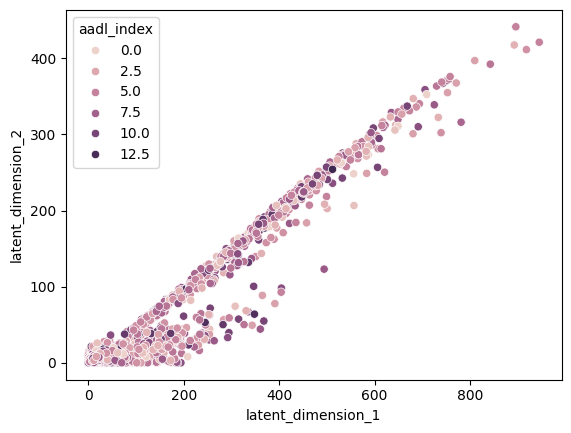

In [24]:
sns.scatterplot(x=X_train_latent['latent_dimension_1'], y=X_train_latent['latent_dimension_2'], hue=y_train['aadl_index'])

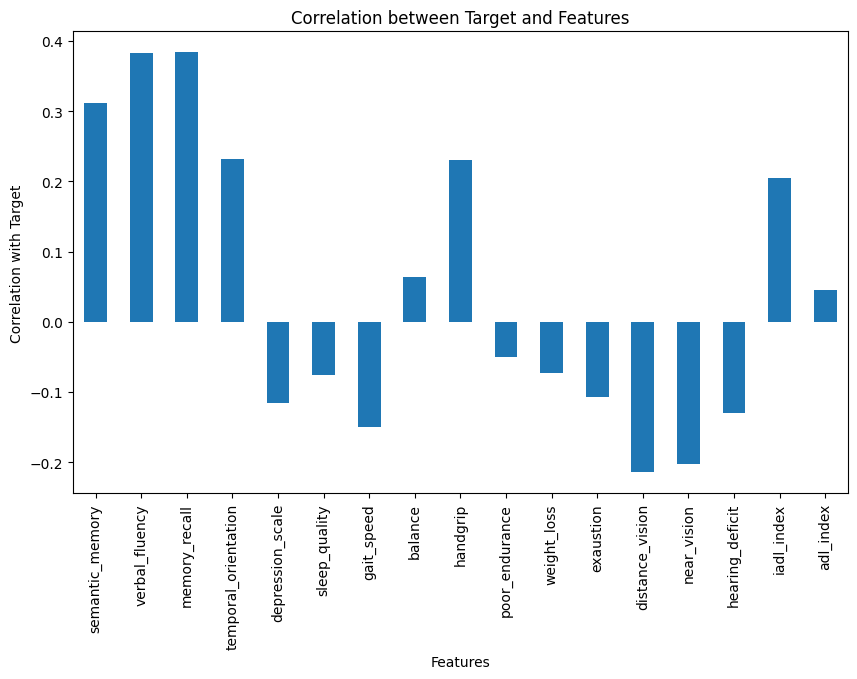

In [58]:
correlation_matrix = df_train.corr()

# Extract the correlation with the target variable
target_correlation = correlation_matrix['aadl_index'].drop('aadl_index')

# Plot the correlations
plt.figure(figsize=(10, 6))
target_correlation.plot(kind='bar')
plt.title('Correlation between Target and Features')
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.show()

### Trying a regression model for aadl

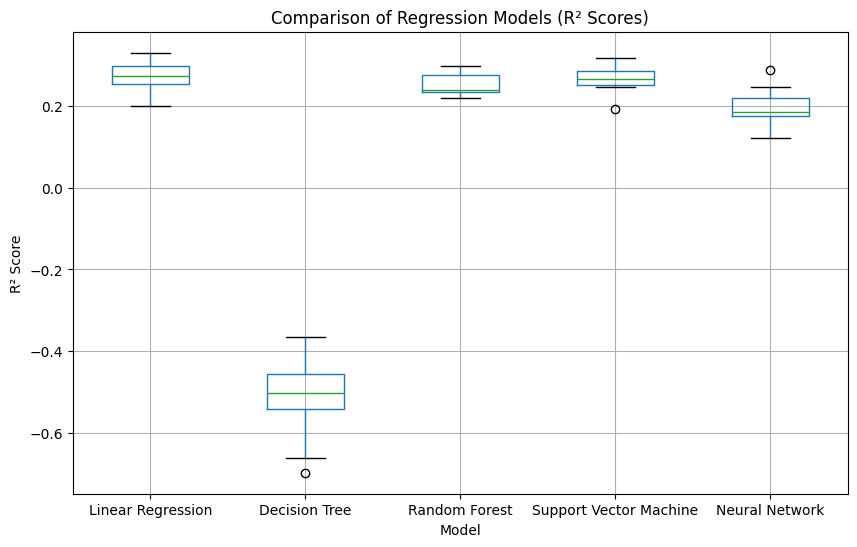

In [70]:

def create_nn_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR(),
    'Neural Network': KerasRegressor(build_fn=create_nn_model, epochs=50, batch_size=32, verbose=0)
}

# Perform cross-validation and collect R² scores
results = {}
kf = KFold(n_splits=10, shuffle=True, random_state=0)
for name, model in models.items():
    if name == 'Neural Network':
        # Use KerasRegressor with KFold for cross-validation
        scores = cross_val_score(model, X_train_scaled,  y_train['aadl_index'], cv=kf, scoring='r2')
    else:
        scores = cross_val_score(model, X_train_scaled, y_train['aadl_index'], cv=kf, scoring='r2')
    results[name] = scores

# Convert results to DataFrame for easier plotting
results_df = pd.DataFrame(results)

# Plot the results using a boxplot
plt.figure(figsize=(10, 6))
results_df.boxplot()
plt.title('Comparison of Regression Models (R² Scores)')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.show()